In [49]:
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
df = pd.read_csv('email.csv')
df.sample(5)

,Category,Message
404,ham,None of that's happening til you get here though
4474,ham,S but not able to sleep.
2477,ham,i dnt wnt to tlk wid u
5112,spam,December only! Had your mobile 11mths+? You ar...
522,ham,Shall i come to get pickle


In [53]:
df.shape

(5573, 2)

In [55]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [57]:
df.Category.unique()

array(['ham', 'spam', '{"mode":"full"'], dtype=object)

In [59]:
df = df[df['Category'] != '{"mode":"full"']

In [61]:
df.Category.unique()

array(['ham', 'spam'], dtype=object)

In [63]:
df.shape

(5572, 2)

In [65]:
from sklearn.preprocessing import OneHotEncoder

In [67]:
ohe = OneHotEncoder(handle_unknown='ignore',sparse_output=False).set_output(transform='pandas')

In [69]:
ohe_transform = ohe.fit_transform(df[['Category']])
ohe_transform

,Category_ham,Category_spam
0,1.0,0.0
1,1.0,0.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0
...,...,...
5567,0.0,1.0
5568,1.0,0.0
5569,1.0,0.0
5570,1.0,0.0


In [71]:
df = pd.concat([df,ohe_transform],axis='columns')
df

,Category,Message,Category_ham,Category_spam
0,ham,"Go until jurong point, crazy.. Available only ...",1.0,0.0
1,ham,Ok lar... Joking wif u oni...,1.0,0.0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0.0,1.0
3,ham,U dun say so early hor... U c already then say...,1.0,0.0
4,ham,"Nah I don't think he goes to usf, he lives aro...",1.0,0.0
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,0.0,1.0
5568,ham,Will ü b going to esplanade fr home?,1.0,0.0
5569,ham,"Pity, * was in mood for that. So...any other s...",1.0,0.0
5570,ham,The guy did some bitching but I acted like i'd...,1.0,0.0


In [73]:
df.drop(['Category_ham','Category'],axis=1,inplace=True)
df.head()

,Message,Category_spam
0,"Go until jurong point, crazy.. Available only ...",0.0
1,Ok lar... Joking wif u oni...,0.0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1.0
3,U dun say so early hor... U c already then say...,0.0
4,"Nah I don't think he goes to usf, he lives aro...",0.0


In [75]:
df['Category_spam'] = df.Category_spam.astype(int)
df.head()

,Message,Category_spam
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [77]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
model = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('lr', LogisticRegression())
])

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.Message,df.Category_spam,test_size=0.3,random_state=100)

In [81]:
model.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('lr', LogisticRegression())])

In [83]:
model.score(X_test,y_test)

0.9838516746411483

In [85]:
model.score(X_train,y_train)

0.9969230769230769

In [87]:
y_predict = model.predict(X_test)

In [89]:
from sklearn.metrics import confusion_matrix

In [91]:
cm = confusion_matrix(y_test,y_predict)
cm

array([[1447,    1],
       [  26,  198]], dtype=int64)

<function matplotlib.pyplot.show(close=None, block=None)>

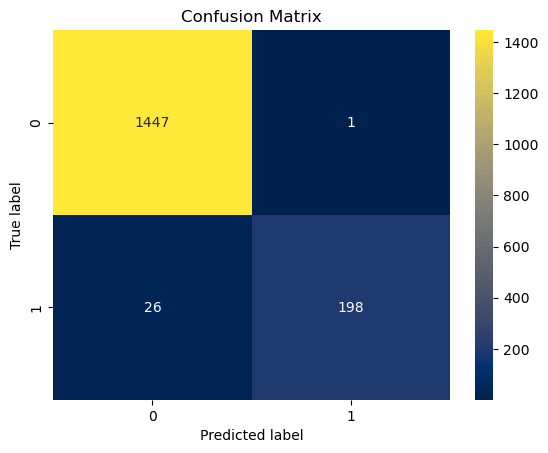

In [93]:
import seaborn as sns
cm = confusion_matrix(y_test, ++y_predict)

sns.heatmap(cm, annot=True, cmap="cividis", fmt="d")

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')

plt.show

In [95]:
email = '''Set your goals + new free course reminder
Did you achieve your goals last week?

Hey, Happy Monday!

First,

As always, it your turn to participate in our monday tradition:

Set and track your goals in our Monday Motivation post!

Second,

Last week, we launched another free course platform.

It’s called Index Institution and it’s run by my brother.

We teach investing skills to anyone, for free so you can:

✔️ Build and manage your own investments
✔️ Build the habits & knowledge create true long-term wealth

Sign up for the course here:

You’ll be invited to the skool community. I would love for you to introduce yourself there and give the course a go!

See you there!
'''

In [97]:
model.predict([email])

array([1])